## Корреляция

Посмотрим, как считать изученные коэффициенты корреляции в Python

In [1]:
# как обычно, начнем с импорта нужных библиотек
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# и зафиксируем seed
np.random.seed(123)

В файле **pressure.xls** приводятся для 15 пациентов данные о систолическом и диастолическом давлении крови непосредственно до принятия и спустя 2 часа после принятия 25 мг каптоприла. 
  
Имеется ли связь между снижением систолического и диастолического давления? Вычислите все изученные коэфиициенты корреляции и проверьте их значимость. Есть ли среди данных выбросы? 

In [6]:
# сначала импортируем данные

data = pd.read_excel('data/pressure.xls')

In [7]:
data

,СистДо,СистПосл,ДиасДо,ДиасПосл
0,210,201,130,125
1,169,165,122,121
2,187,166,124,121
3,160,157,104,106
4,167,174,112,100
5,176,145,103,85
6,185,168,121,98
7,206,180,124,105
8,173,147,115,103
9,146,136,100,98


In [8]:
DP1 = data["СистДо"] - data["СистПосл"]
DP2 = data["ДиасДо"] - data["ДиасПосл"]

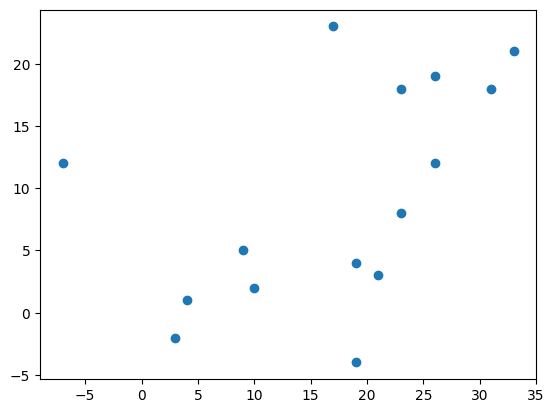

In [9]:
# посмотрим на данные

plt.scatter(DP1, DP2)
plt.show()

In [10]:
# коэффициент корреляции Пирсона

stats.pearsonr(DP1,DP2)

PearsonRResult(statistic=0.4950489229547466, pvalue=0.06062278606988298)

In [26]:
x = np.random.rand(1000)*10
y = np.concatenate([x[:-1],np.array([1000])])

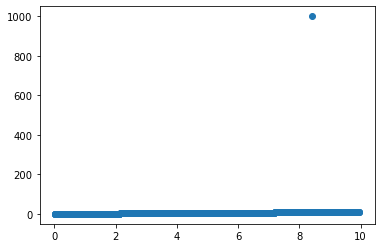

In [31]:
plt.scatter(x, y)
plt.show()

In [29]:
stats.pearsonr(x,y)

(0.12555025376545986, 6.861319216334119e-05)

In [11]:
# коэффициент корреляции Спирмена

stats.spearmanr(DP1,DP2)

SignificanceResult(statistic=0.5560540352929466, pvalue=0.03136092274689518)

In [12]:
# коэффициент корреляции Кендалла

stats.kendalltau(DP1,DP2)

SignificanceResult(statistic=0.4487858273467833, pvalue=0.022003125837031883)

Давайте уберем одну точку, которая нам кажется выбросом и посмотрим, что случится с коэффициентами корреляции. У этой точки отрицательные изменения в DP1.

In [15]:
data_new = data[DP1>0]

DP1_new = data_new["СистДо"] - data_new["СистПосл"]
DP2_new = data_new["ДиасДо"] - data_new["ДиасПосл"]

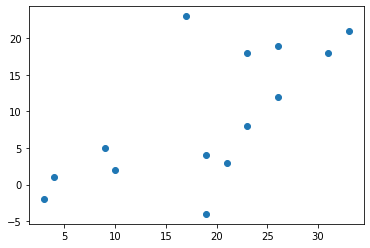

In [16]:
# еще раз посмотрим на данные

plt.scatter(DP1_new, DP2_new)
plt.show()

In [17]:
# коэффициент корреляции Пирсона

stats.pearsonr(DP1_new,DP2_new)

(0.679798781076268, 0.0074792869569106695)

In [ ]:
# коэффициент корреляции Спирмена

stats.spearmanr(DP1_new,DP2_new)

In [ ]:
# коэффициент корреляции Кендалла

stats.kendalltau(DP1_new,DP2_new)

In [51]:
x = np.random.normal(1,3, size = (10000,1000))

a = np.random.normal(2,5, size = 1000)
b = np.random.normal(3,5, size = 1000)



# y = 

In [18]:
x = np.zeros(shape = (2,3))

x[0,0] = 1
x[1,2] = 1
x[1,1] = 1

array([[2., 1.],
       [1., 3.],
       [1., 4.]])

In [58]:
pseudolinear  = x*a+b + np.random.normal(0,1, size = (10000,1000))

In [48]:
a.std()

1.841390937473234

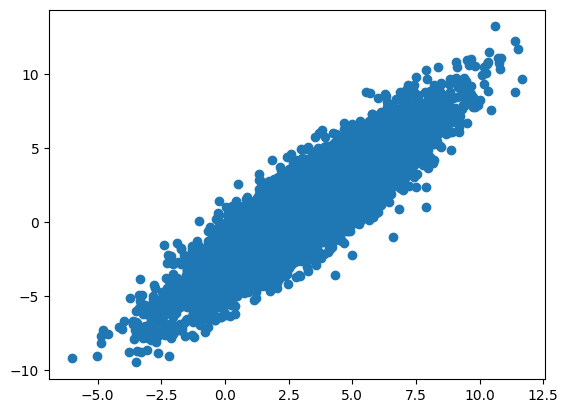

In [59]:
plt.scatter(pseudolinear[:,0], x[:,0])
plt.show()

In [ ]:
pseudolinear[:,0], x[:,0]

In [69]:
sp = [stats.spearmanr(pseudolinear[:,i], x[:,i]).statistic for i in range(1000)]
pearson = [stats.pearsonr(pseudolinear[:,i], x[:,i]).statistic for i in range(1000)]
kendall = [stats.kendalltau(pseudolinear[:,i], x[:,i]).statistic for i in range(1000)]

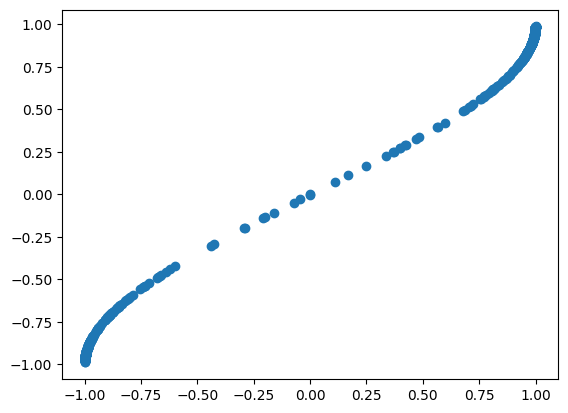

In [71]:
plt.scatter(sp, kendall)
plt.show()

In [73]:
stats.spearmanr??

In [75]:
stats.mannwhitneyu??

In [84]:
plt.hist??

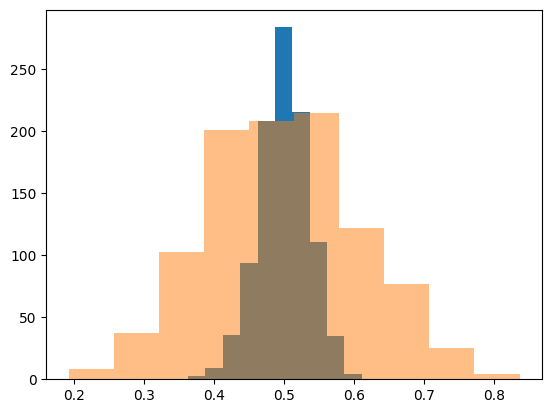

In [87]:
plt.hist(np.random.beta(100,100, size = 1000))
plt.hist(np.random.beta(10,10, size = 1000), alpha = 0.5)
plt.show()

# Доля правильного выбора в зависимости от шага

In [89]:
p1, p2 = 0.2, 0.3

a1, b1 = 1, 1
a2, b2 = 1, 1




In [137]:
def generate_beta_sequence(p1 = 0.2, p2 = 0.3, a1 = 1, b1 = 1, a2 = 1, b2 = 1, num_iterations = 1000):
    
    outcome_num_list = []
    outcome_list = []

    for _ in range(num_iterations):
        theta1 = np.random.beta(a1, b1)
        theta2 = np.random.beta(a2, b2)

        if theta1>theta2:
            outcome = np.random.binomial(1, p1)
            outcome_num_list.append(0)
            if outcome == 1:
                a1+=1
            else:
                b1+=1
        else:
            outcome = np.random.binomial(1, p2)
            outcome_num_list.append(1)
            if outcome == 1:
                a2+=1
            else:
                b2+=1

        outcome_list.append(outcome)

    return np.array(outcome_num_list)

In [138]:
# np.random.binomial??

In [139]:
from tqdm import tqdm

In [147]:
outcome_num_list2 = generate_beta_sequence(p1 = 0.295, p2 = 0.3, num_iterations = 10000)

for i in tqdm(range(500)):
    outcome_num_list2 = np.vstack([outcome_num_list2, generate_beta_sequence(p1 = 0.295, p2 = 0.3, num_iterations = 10000)])

100%|█████████████████████████████████████████| 500/500 [00:07<00:00, 63.25it/s]


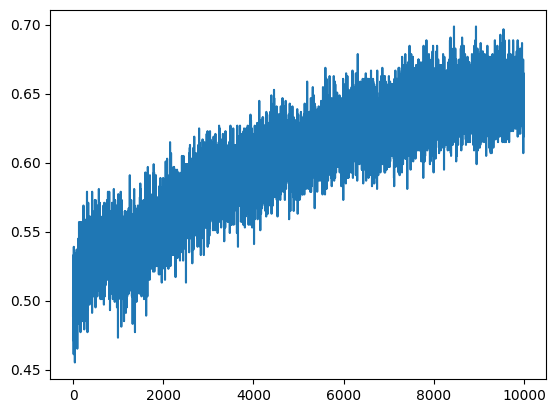

In [148]:
plt.plot(outcome_num_list2.mean(axis = 0))
plt.show()

**Вывод** в этой задаче мы делаем следующий: снижение систолического и диастолического давления положительно коррелированы. И эта корреляция значима. Кроме того, мы лишний раз убедились в том, что коэффициент корреляции Пирсона подвержен сильному влиянию выбросов. 